# Predicting Obesity Levels Based On Eating Habits and Physical Condition

## Introduction to Problem & Data

#### Data Pre-Processing & Preliminary Examination:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from sklearn.preprocessing import LabelEncoder

In [ ]:
data_path = 'ObesityDataSet_raw_and_data_sinthetic.csv'
data = pd.read_csv(data_path)
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [ ]:
label_encoder = LabelEncoder()

categorical_columns = data.select_dtypes(include=['object']).columns

for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])

data.head()


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,1
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,1
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,1
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,5
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,6


In [ ]:
data.describe()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,0.505921,24.312600,1.701677,86.586058,0.817622,0.883941,2.419043,2.685628,1.859308,0.020843,2.008011,0.045476,1.010298,0.657866,2.268593,2.365230,3.015632
std,0.500083,6.345968,0.093305,26.191172,0.386247,0.320371,0.533927,0.778039,0.468543,0.142893,0.612953,0.208395,0.850592,0.608927,0.515498,1.261423,1.952090
min,0.000000,14.000000,1.450000,39.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,19.947192,1.630000,65.473343,1.000000,1.000000,2.000000,2.658738,2.000000,0.000000,1.584812,0.000000,0.124505,0.000000,2.000000,3.000000,1.000000
50%,1.000000,22.777890,1.700499,83.000000,1.000000,1.000000,2.385502,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,0.625350,2.000000,3.000000,3.000000
75%,1.000000,26.000000,1.768464,107.430682,1.000000,1.000000,3.000000,3.000000,2.000000,0.000000,2.477420,0.000000,1.666678,1.000000,3.000000,3.000000,5.000000
max,1.000000,61.000000,1.980000,173.000000,1.000000,1.000000,3.000000,4.000000,3.000000,1.000000,3.000000,1.000000,3.000000,2.000000,3.000000,4.000000,6.000000


## Exploratory Data Analysis

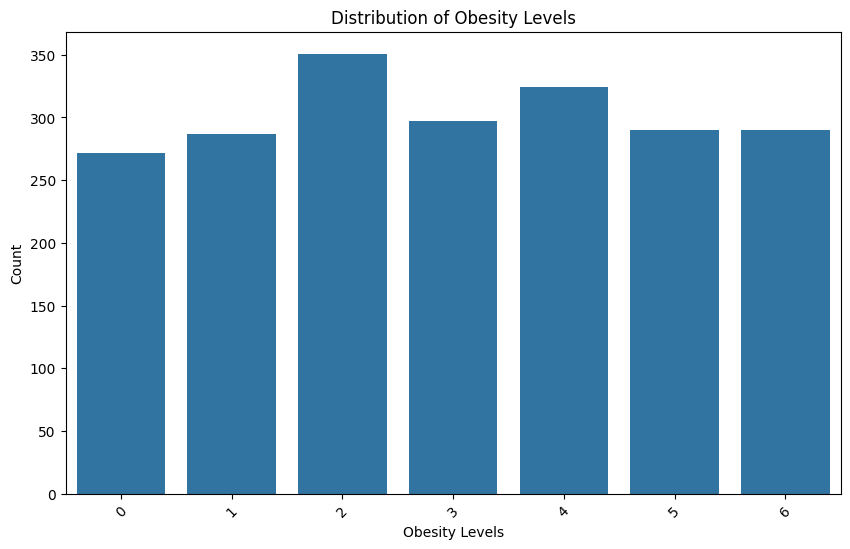

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='NObeyesdad', data=data)
plt.title('Distribution of Obesity Levels')
plt.xlabel('Obesity Levels')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Calculate correlation of numerical features with obesity level
correlation_with_obe = data.corr()['NObeyesdad'].sort_values(ascending=False).drop('NObeyesdad')

correlation_with_obe

,NObeyesdad
Weight,0.387643
CAEC,0.327295
family_history_with_overweight,0.313667
Age,0.236170
CH2O,0.108868
FAVC,0.044582
Height,0.038986
Gender,0.024908
FCVC,0.018522
SMOKE,-0.023256


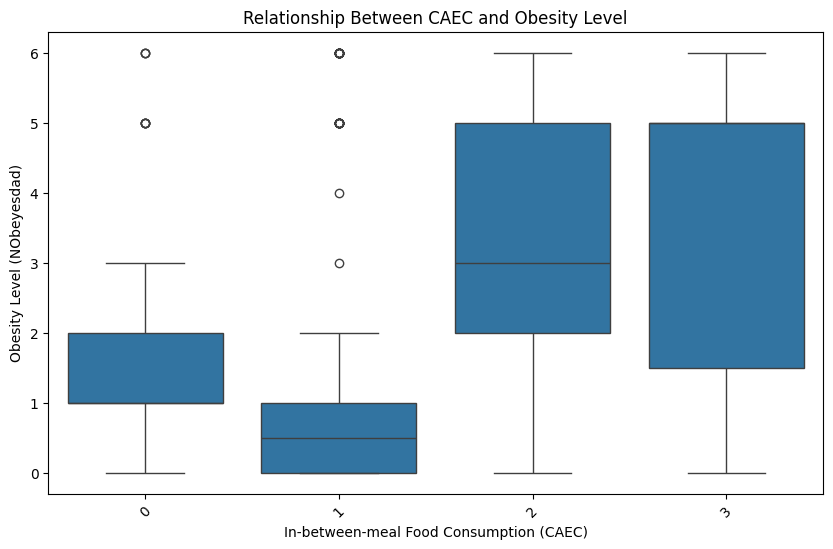

In [ ]:
# Box plot for CAEC vs obesity level
plt.figure(figsize=(10, 6))
sns.boxplot(x='CAEC', y='NObeyesdad', data=data)
plt.title('Relationship Between CAEC and Obesity Level')
plt.xlabel('In-between-meal Food Consumption (CAEC)')
plt.ylabel('Obesity Level (NObeyesdad)')
plt.xticks(rotation=45)
plt.show()

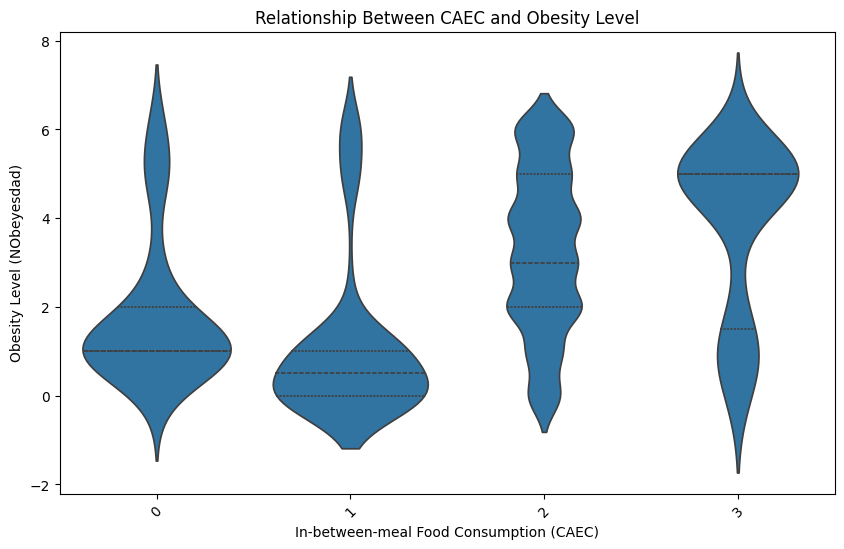

In [ ]:
# Violin plot for CAEC vs obesity level
plt.figure(figsize=(10, 6))
sns.violinplot(x='CAEC', y='NObeyesdad', data=data, inner='quartile')
plt.title('Relationship Between CAEC and Obesity Level')
plt.xlabel('In-between-meal Food Consumption (CAEC)')
plt.ylabel('Obesity Level (NObeyesdad)')
plt.xticks(rotation=45)
plt.show()


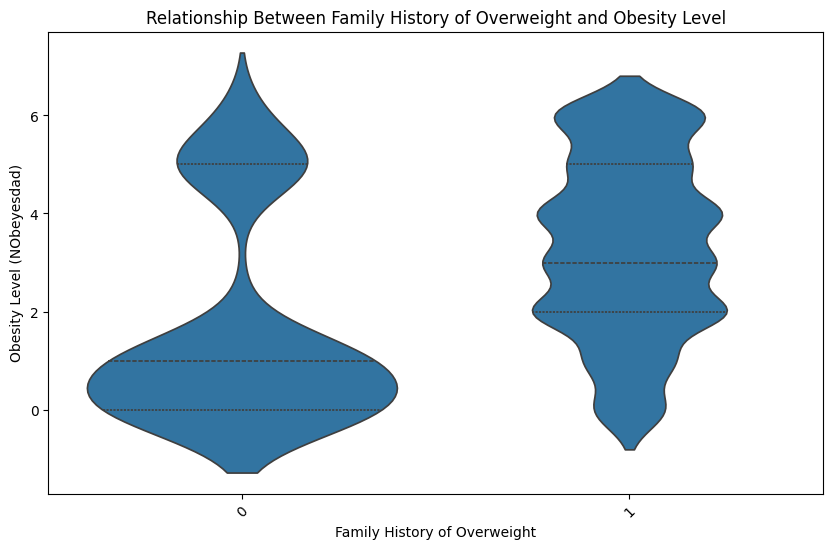

In [ ]:
# Violin plot for family_history_with_overweight vs obesity level
plt.figure(figsize=(10, 6))
sns.violinplot(x='family_history_with_overweight', y='NObeyesdad', data=data, inner='quartile')
plt.title('Relationship Between Family History of Overweight and Obesity Level')
plt.xlabel('Family History of Overweight')
plt.ylabel('Obesity Level (NObeyesdad)')
plt.xticks(rotation=45)
plt.show()

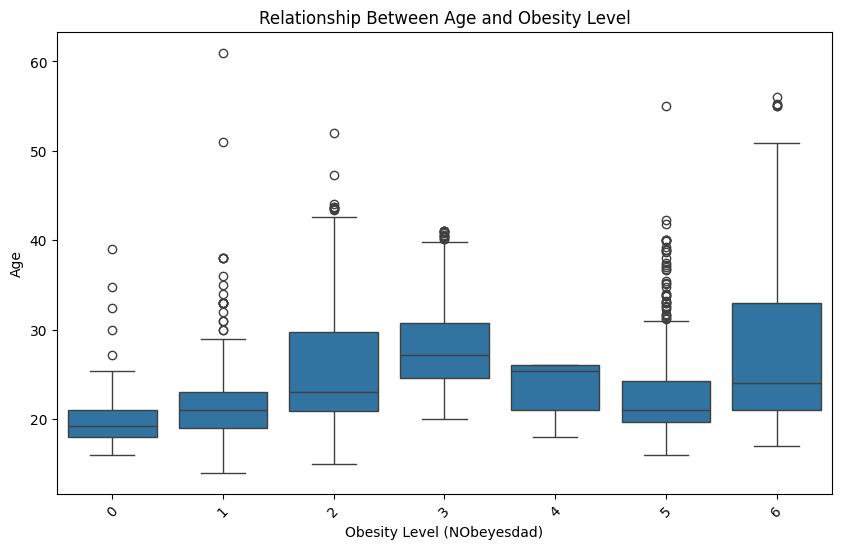

In [ ]:
# Box plot for Age vs Obesity Level
plt.figure(figsize=(10, 6))
sns.boxplot(x='NObeyesdad', y='Age', data=data)
plt.title('Relationship Between Age and Obesity Level')
plt.xlabel('Obesity Level (NObeyesdad)')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.show()

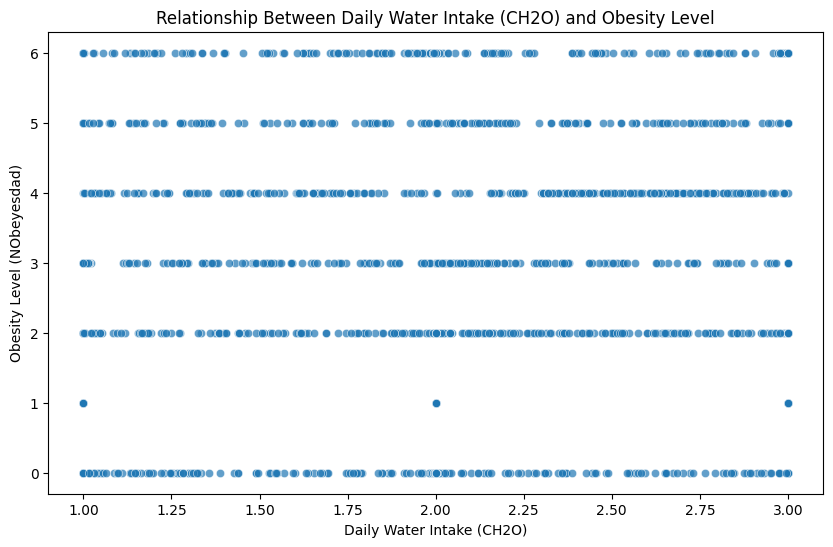

In [ ]:
# Scatter plot for CH2O (Daily Water Intake) vs Obesity Level
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CH2O', y='NObeyesdad', data=data, alpha=0.7)
plt.title('Relationship Between Daily Water Intake (CH2O) and Obesity Level')
plt.xlabel('Daily Water Intake (CH2O)')
plt.ylabel('Obesity Level (NObeyesdad)')
plt.show()


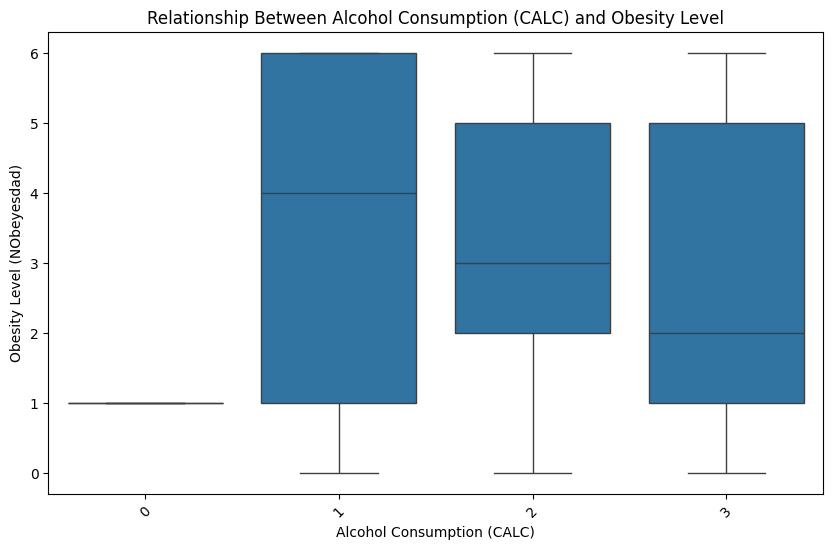

In [ ]:
# Box plot for CALC vs Obesity Level
plt.figure(figsize=(10, 6))
sns.boxplot(x='CALC', y='NObeyesdad', data=data)
plt.title('Relationship Between Alcohol Consumption (CALC) and Obesity Level')
plt.xlabel('Alcohol Consumption (CALC)')
plt.ylabel('Obesity Level (NObeyesdad)')
plt.xticks(rotation=45)
plt.show()

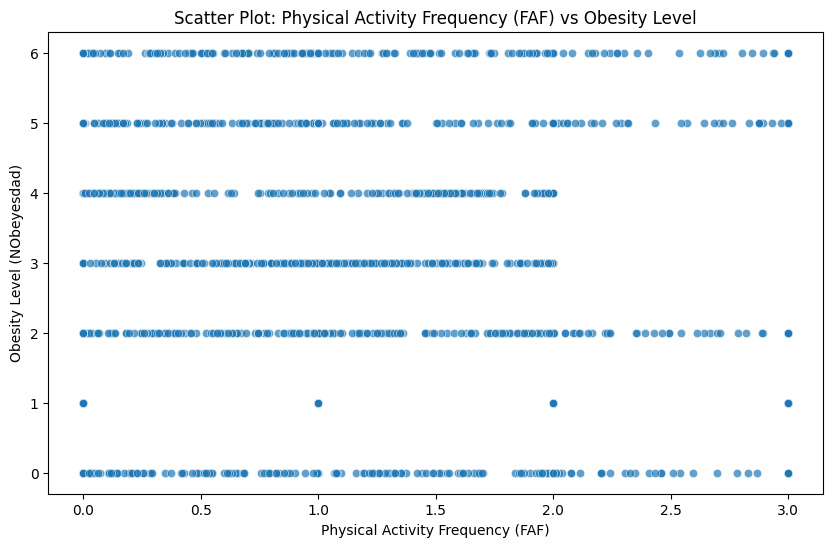

In [ ]:
# Scatter plot for FAF (Physical Activity Frequency) vs Obesity Level
plt.figure(figsize=(10, 6))
sns.scatterplot(x='FAF', y='NObeyesdad', data=data, alpha=0.7)
plt.title('Scatter Plot: Physical Activity Frequency (FAF) vs Obesity Level')
plt.xlabel('Physical Activity Frequency (FAF)')
plt.ylabel('Obesity Level (NObeyesdad)')
plt.show()

## Modeling & Interpretations

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

#### Baseline Model

In [ ]:
y = data['NObeyesdad']
baseline_preds = np.ones(len(y)) * y.mean()
baseline_mse = mean_squared_error(y, baseline_preds)
baseline_mse

3.8088508435545823

#### Logistic Regression Model

In [ ]:
X = data.drop('NObeyesdad', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(max_iter=500, multi_class='ovr', solver='liblinear'))


pipe.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 LogisticRegression(max_iter=500, multi_class='ovr',
                                    solver='liblinear'))])

In [ ]:
logistic_model = LogisticRegression(max_iter=500, multi_class='ovr', solver='liblinear')
logistic_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=500, multi_class='ovr', solver='liblinear')

In [ ]:
y_train_pred = logistic_model.predict(X_train)
y_test_pred = logistic_model.predict(X_test)

In [ ]:
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_mse, test_mse

(2.4680094786729856, 2.8817966903073287)

In [ ]:
perm_importance = permutation_importance(pipe, X_test, y_test, n_repeats=10, random_state=42)

importance_df = pd.DataFrame(perm_importance['importances_mean'], index=X_test.columns, columns=['Importance'])
importance_df.sort_values(by='Importance', ascending=False, inplace=True)

importance_df.head(6)

,Importance
Weight,0.413712
Gender,0.178723
Height,0.096927
FAVC,0.040662
family_history_with_overweight,0.029551
CAEC,0.026005


#### K-Nearest Neighbors Regression Model

In [ ]:
X = data.drop('NObeyesdad', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', KNeighborsClassifier())
])

In [ ]:
param_grid = {
    'model__n_neighbors': [3, 5, 7, 10, 15, 20, 25]
}

In [ ]:
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', KNeighborsClassifier())]),
             param_grid={'model__n_neighbors': [3, 5, 7, 10, 15, 20, 25]},
             scoring='accuracy', verbose=1)

In [ ]:
best_params = grid_search.best_params_
best_knn = grid_search.best_estimator_
y_test_pred = best_knn.predict(X_test)
y_train_preds = best_knn.predict(X_train)
test_mse = mean_squared_error(y_test, y_test_pred)
train_mse = mean_squared_error(y_train, y_train_preds)
best_params, test_mse, train_mse

({'model__n_neighbors': 3}, 2.137115839243499, 1.120260663507109)

In [ ]:
perm_importance = permutation_importance(best_knn, X_test, y_test, n_repeats=10, random_state=42)

importance_df = pd.DataFrame(perm_importance['importances_mean'], index=X_train.columns, columns=['Importance'])
importance_df.sort_values(by='Importance', ascending=False, inplace=True)
importance_df.head(6)

,Importance
Weight,0.149882
Gender,0.145154
CALC,0.110165
FAVC,0.086052
family_history_with_overweight,0.085343
MTRANS,0.076123


#### Decision Tree Regression Model

In [ ]:
X = data.drop('NObeyesdad', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

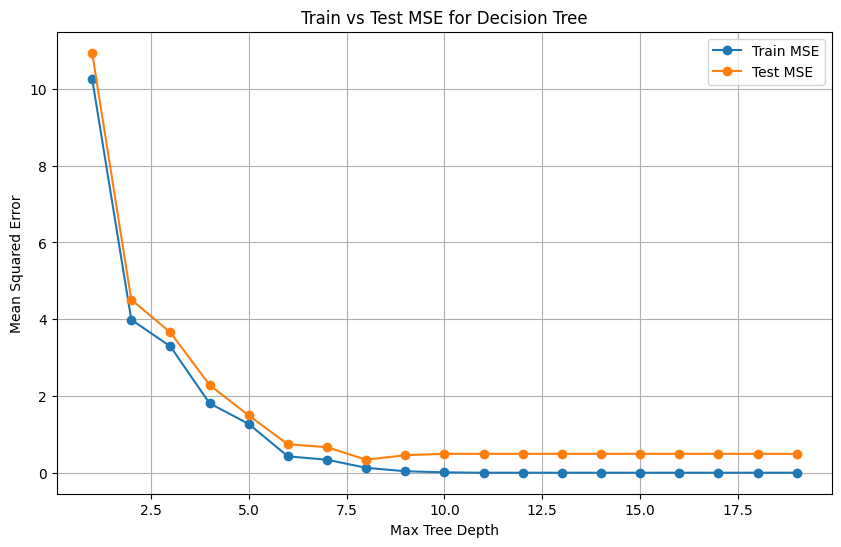

In [ ]:
train_scores = []
test_scores = []

for d in range(1, 20):
    dtree = DecisionTreeClassifier(max_depth=d, random_state=42)
    dtree.fit(X_train, y_train)
    y_train_pred = dtree.predict(X_train)
    y_test_pred = dtree.predict(X_test)
    train_scores.append(mean_squared_error(y_train, y_train_pred))
    test_scores.append(mean_squared_error(y_test, y_test_pred))

plt.figure(figsize=(10, 6))
plt.plot(range(1, 20), train_scores, 'o-', label='Train MSE')
plt.plot(range(1, 20), test_scores, 'o-', label='Test MSE')
plt.xlabel("Max Tree Depth")
plt.ylabel("Mean Squared Error")
plt.title("Train vs Test MSE for Decision Tree")
plt.legend()
plt.grid()
plt.show()


In [ ]:
optimal_depth = 6

dtree = DecisionTreeClassifier(max_depth=optimal_depth, random_state=42)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=42)

In [ ]:
y_train_pred = dtree.predict(X_train)
y_test_pred = dtree.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_mse, test_mse

(0.42713270142180093, 0.7399527186761229)

In [ ]:
perm_importance = permutation_importance(dtree, X_test, y_test, n_repeats=10, random_state=42)

importance_df = pd.DataFrame(perm_importance['importances_mean'], index=X.columns, columns=['Importance'])
importance_df.sort_values(by='Importance', ascending=False, inplace=True)
importance_df.head(6)

,Importance
Weight,0.694799
Height,0.259338
Gender,0.149645
Age,0.057210
CALC,0.027187
NCP,0.025296


#### Random Forest Regression Model

In [ ]:
X = data.drop('NObeyesdad', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
param_grid = {
    'model__n_estimators': [50, 100, 150, 200],
    'model__max_depth': [3, 4, 5, 6, 10]
}

pipe = Pipeline([
    ('model', RandomForestRegressor(random_state=42))
])


grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model',
                                        RandomForestRegressor(random_state=42))]),
             param_grid={'model__max_depth': [3, 4, 5, 6, 10],
                         'model__n_estimators': [50, 100, 150, 200]},
             scoring='neg_mean_squared_error')

In [ ]:
best_params = grid_search.best_params_
best_forest = grid_search.best_estimator_
best_params

{'model__max_depth': 10, 'model__n_estimators': 100}

In [ ]:
y_train_pred = best_forest.predict(X_train)
y_test_pred = best_forest.predict(X_test)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_mse, test_mse

(0.06691469480137595, 0.4037246681676162)

In [ ]:
perm_importance = permutation_importance(best_forest, X_test, y_test, n_repeats=10, random_state=42)
importance_df = pd.DataFrame(perm_importance['importances_mean'], index=X_train.columns, columns=['Importance'])
importance_df.sort_values(by='Importance', ascending=False, inplace=True)
importance_df.head(6)

,Importance
Weight,1.592992
Height,0.563335
Gender,0.086053
Age,0.021339
CAEC,0.019074
TUE,0.016520
